# Import modules

In [1]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader


reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Plugins(categories=["generic"]).list()

assert device.type == 'cuda'


/home/bv292/miniconda/envs/test_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Reload

In [2]:
import importlib
import DGE_experiments
import DGE_data
import DGE_utils
importlib.reload(DGE_experiments)
importlib.reload(DGE_data)
importlib.reload(DGE_utils)


<module 'DGE_utils' from '/home/bv292/synthcity/DGE_utils.py'>

# Load data and settings

In [3]:
from DGE_data import get_real_and_synthetic

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', 'gaussian', 'adult',  'breast_cancer',  'seer', 'cutract' ] 
#['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ] 
model_name = 'ctgan'  # synthetic data model
    
p_train = 0.8  # proportion of training data for generative model. Default values if None
n_models = 20  # number of models in ensemble
max_n = 2000 # maximum number of data points to use for training generative model.
nsyn = 5000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = False

def get_folder_names(dataset, model_name, ntrain, nsyn):
    workspace_folder = os.path.join("workspace", dataset, model_name, f'nmax_{max_n}_nsyn_{nsyn}')
    results_folder = os.path.join("uncertainty_results",f'{dataset}_{model_name}_nmax_{max_n}_nsyn_{nsyn}')
    return workspace_folder, results_folder

In [4]:
for dataset in datasets:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(dataset, model_name, max_n, nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n)


    nsyn = len(X_syns[0])
    print('Shape of each synthetic dataset:', X_syns[0].shape)
    print('Target type:', X_gt.targettype)


Dataset: moons
n_total 10000 n_train: 2000
Shape of each synthetic dataset: (2000, 3)
Target type: classification
Dataset: circles
n_total 10000 n_train: 2000
Shape of each synthetic dataset: (2000, 3)
Target type: classification
Dataset: gaussian
n_total 40000 n_train: 2000
Shape of each synthetic dataset: (2000, 3)
Target type: classification
Dataset: adult
n_total 32561 n_train: 2000
Shape of each synthetic dataset: (2000, 14)
Target type: classification
Dataset: breast_cancer
n_total 569 n_train: 455
Shape of each synthetic dataset: (455, 31)
Target type: classification
Dataset: seer
n_total 20000 n_train: 2000
Shape of each synthetic dataset: (2000, 7)
Target type: classification
Dataset: cutract
n_total 20000 n_train: 2000
Shape of each synthetic dataset: (2000, 7)
Target type: classification


# Experiments

## Model Training

n_total 10000 n_train: 2000
Dataset moons

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k20mean.png


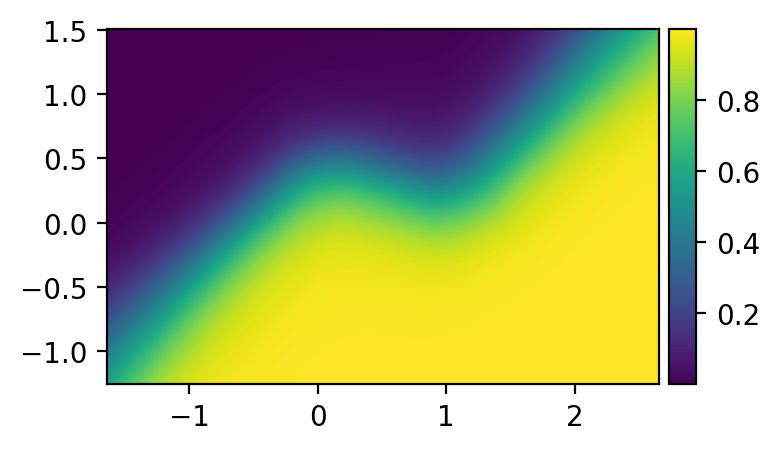

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k20std.png


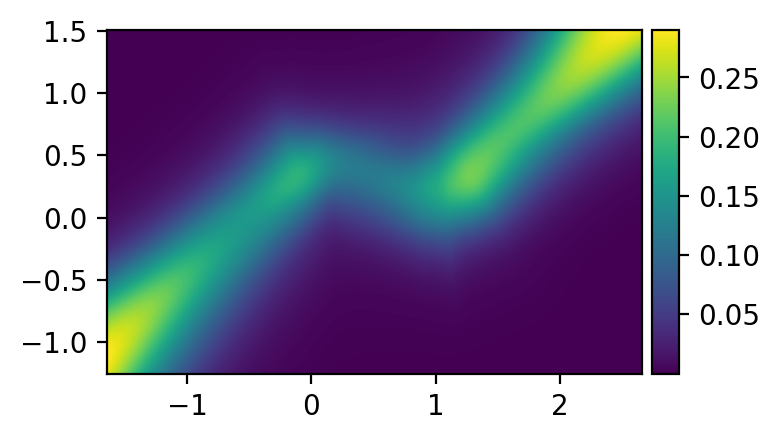

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10mean.png


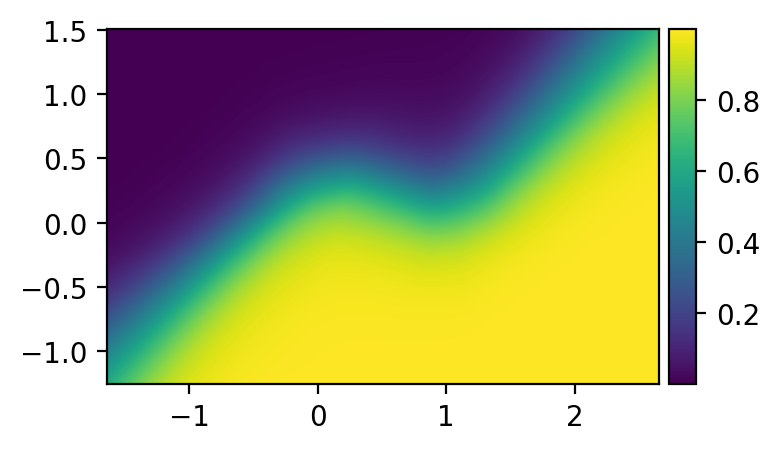

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10std.png


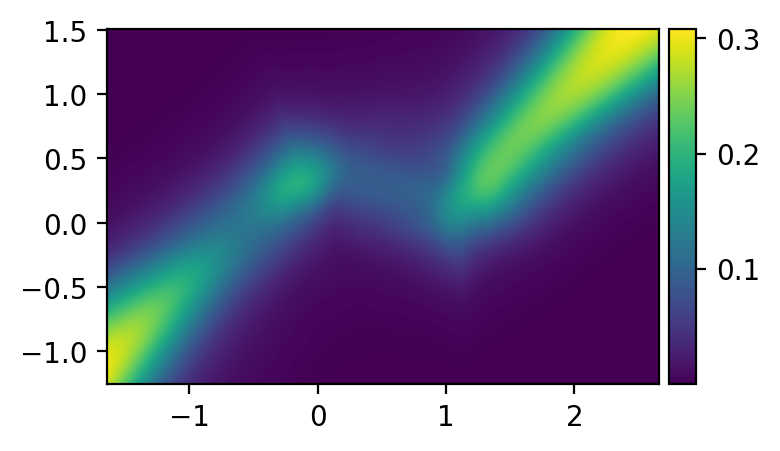

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5mean.png


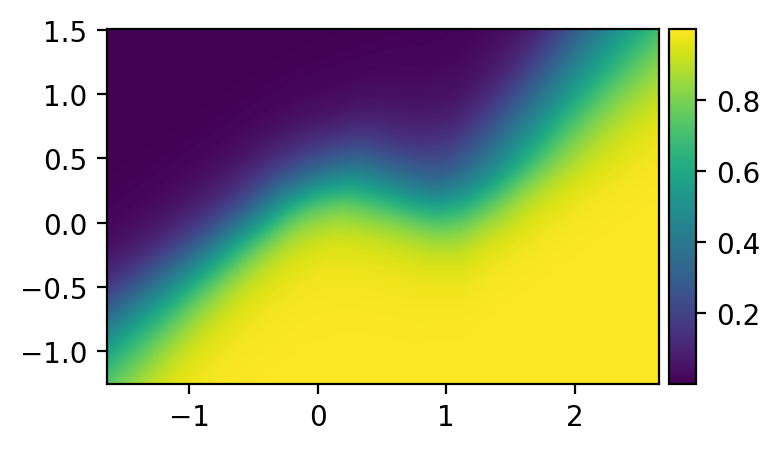

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5std.png


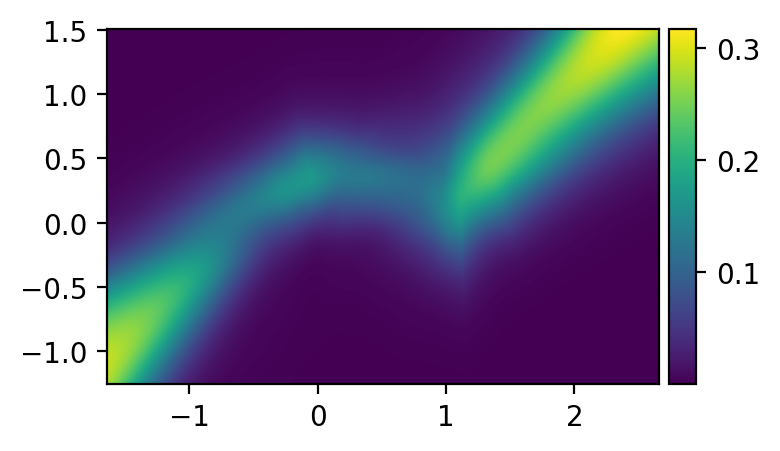

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_mean.png


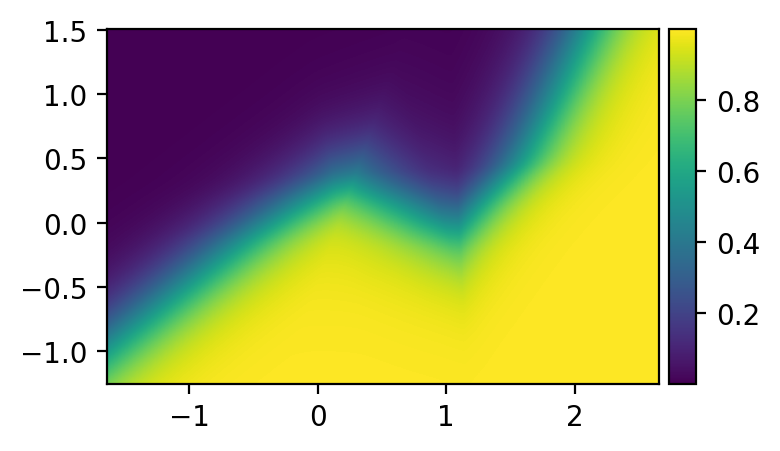

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_std.png


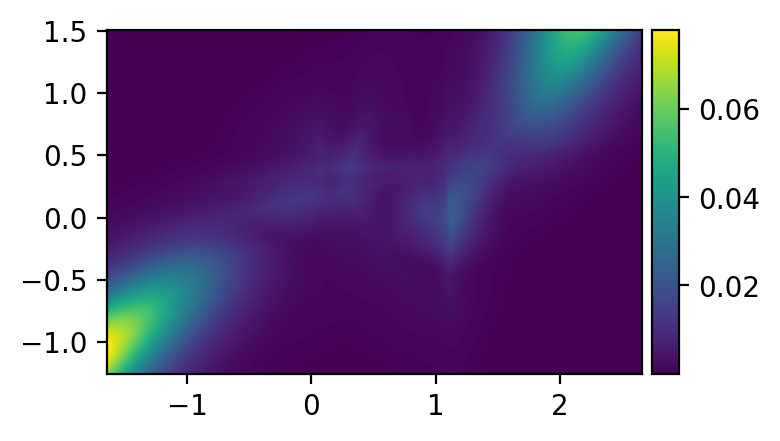

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_oraclemean.png


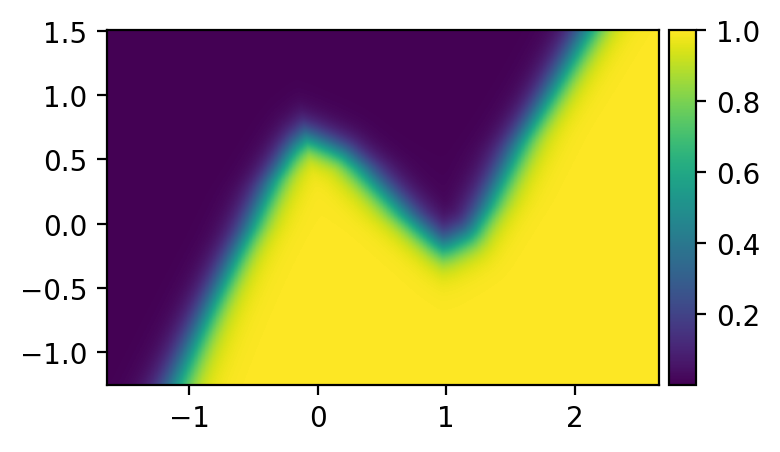

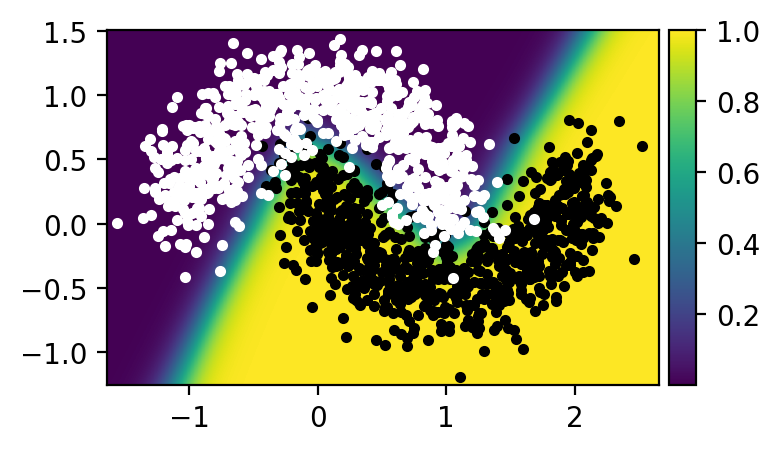

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_oraclestd.png


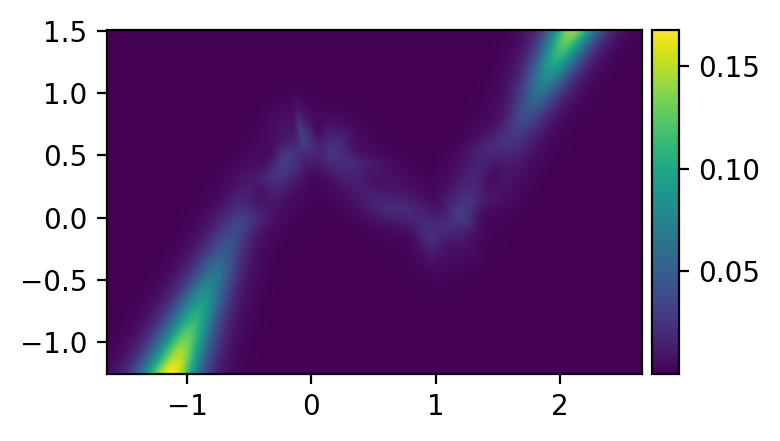

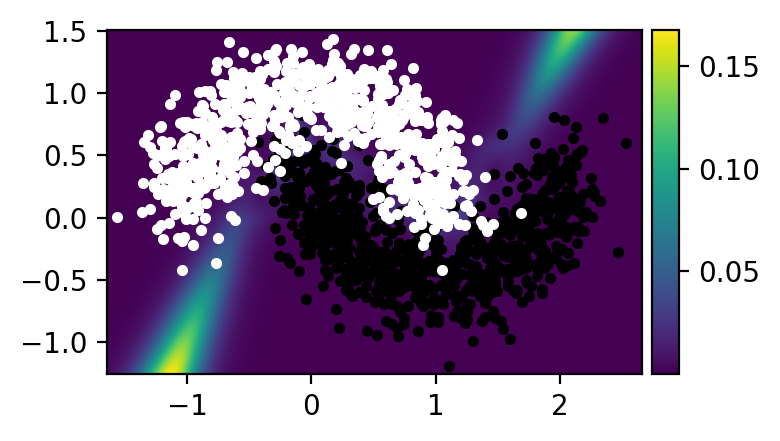

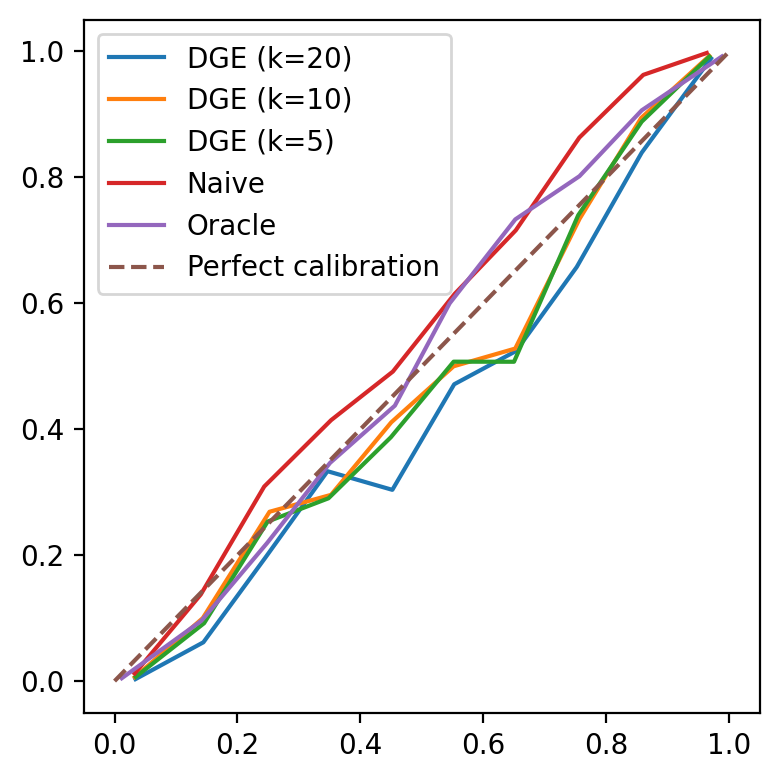

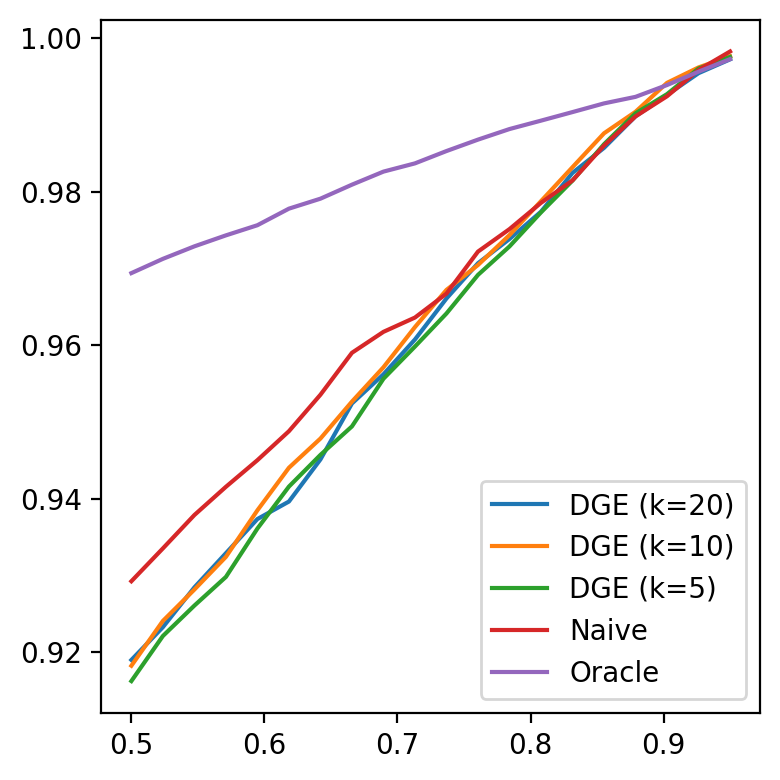

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.981000 &  0.919000 &  0.921000 &   0.900000 &  0.943000 &  0.192000 &  0.057000 \\
DGE (k=10)              &  0.980000 &  0.918000 &  0.919000 &   0.912000 &  0.926000 &  0.192000 &  0.057000 \\
DGE (k=5)               &  0.979000 &  0.916000 &  0.917000 &   0.912000 &  0.922000 &  0.200000 &  0.059000 \\
Oracle                  &  0.996000 &  0.969000 &  0.969000 &   0.970000 &  0.969000 &  0.085000 &  0.024000 \\
Naive (single) median   &  0.980500 &  0.916000 &  0.917500 &   0.903500 &  0.946000 &  0.203000 &  0.061000 \\
Naive (single) mean     &  0.978750 &  0.915950 &  0.917850 &   0.899750 &  0.938200 &  0.206100 &  0.061150 \\
Naive (single) std      &  0.008160 &  0.018904 &  0.018139 &   0.032314 &  0.029691 &  0.035158 &  0.012310 \\
Naive (single) min      &  0.956000 &  0.872000 &  0.876000 &   0.848000 &  0.896

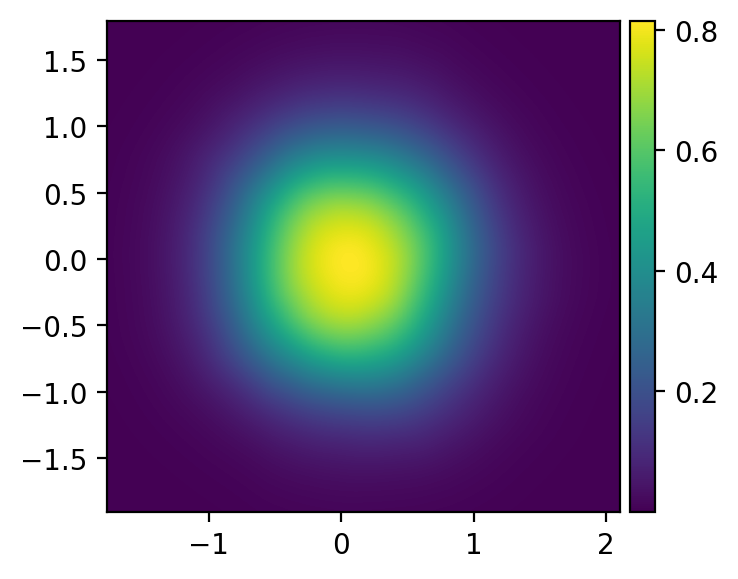

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k20std.png


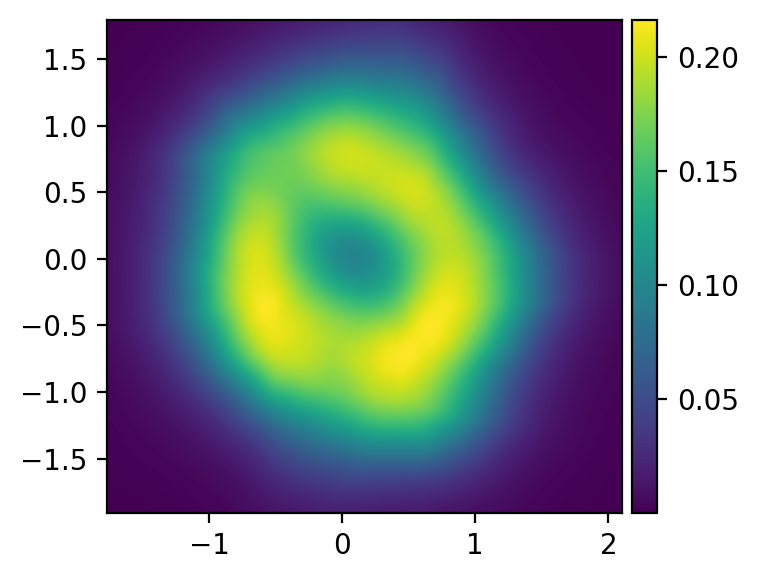

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10mean.png


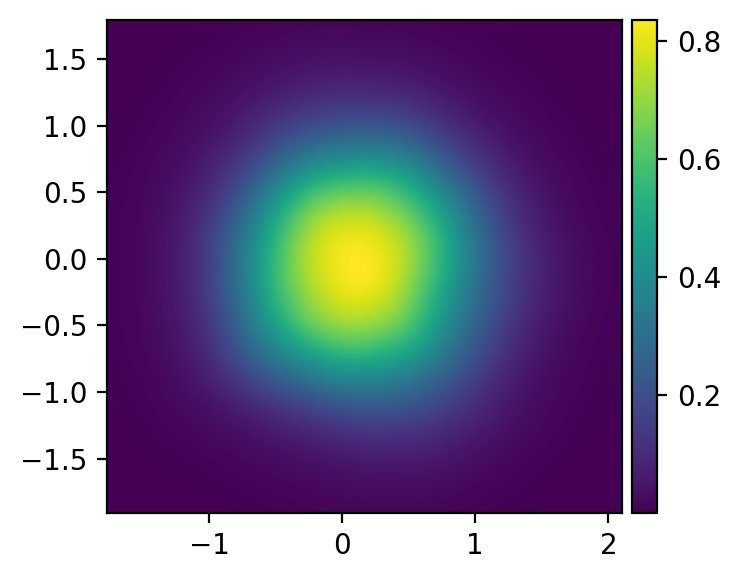

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10std.png


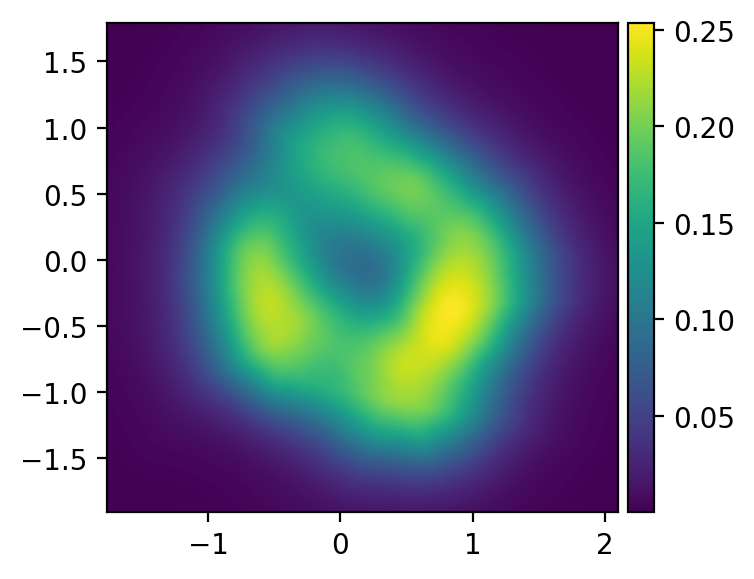

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5mean.png


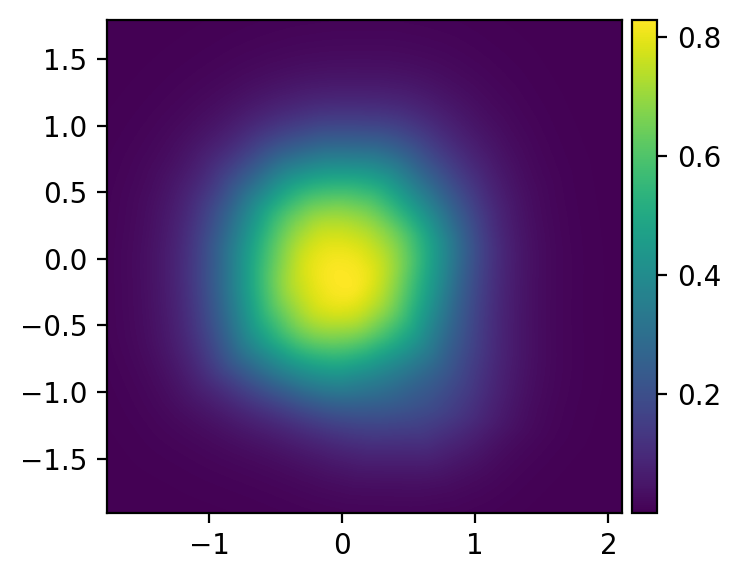

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5std.png


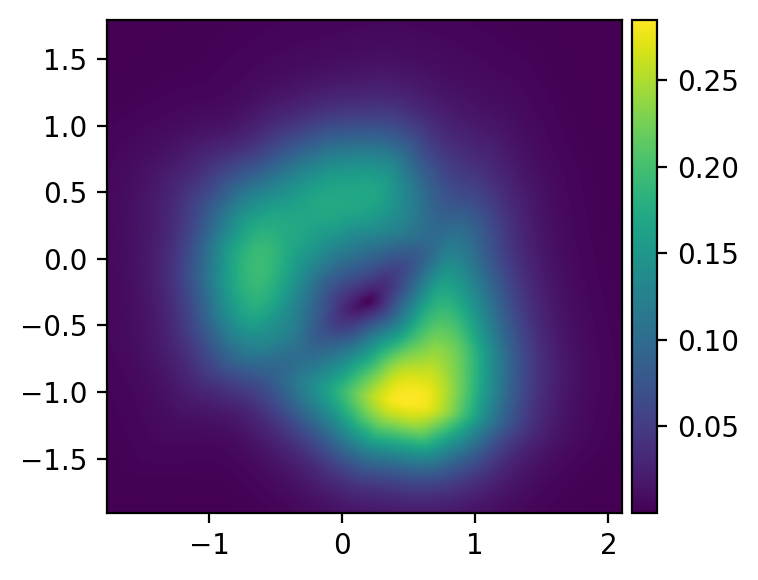

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_mean.png


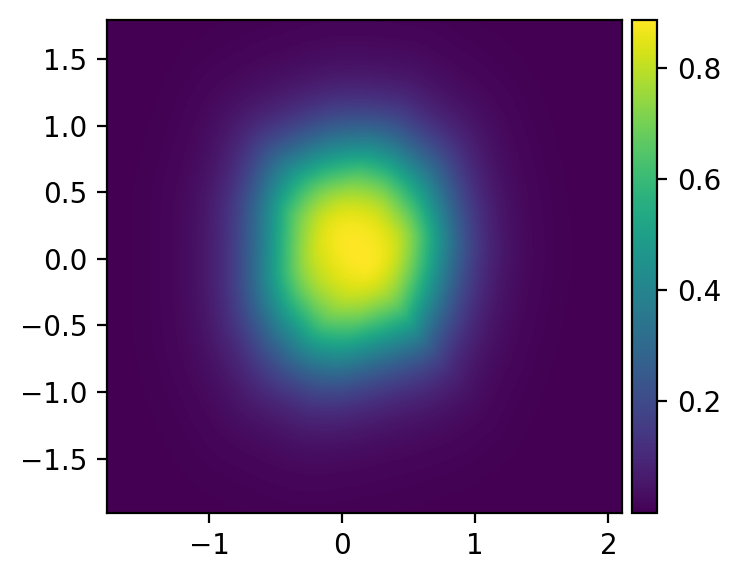

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_std.png


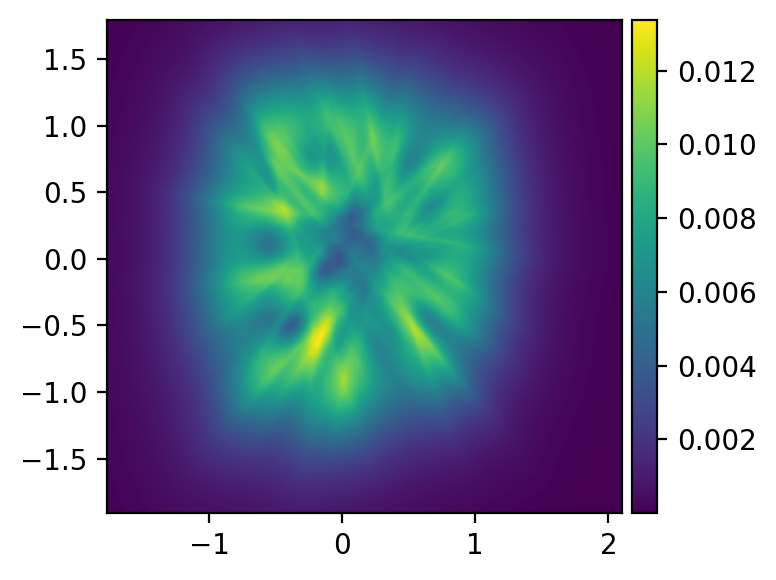

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_oraclemean.png


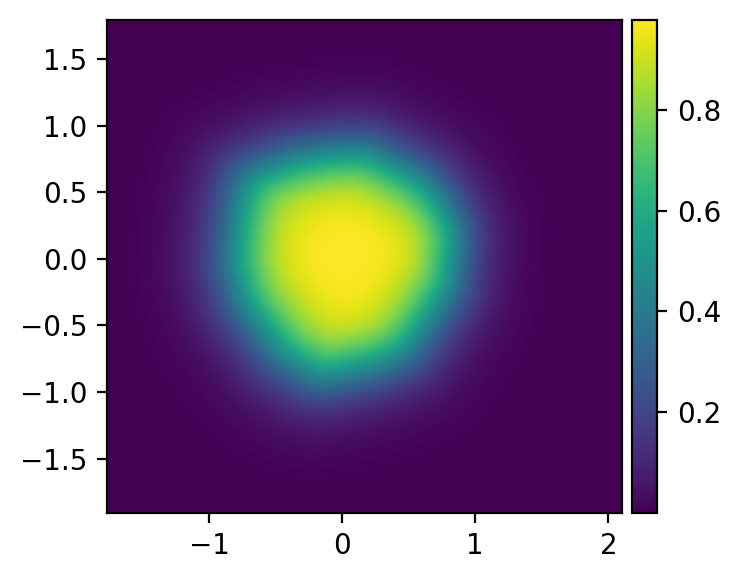

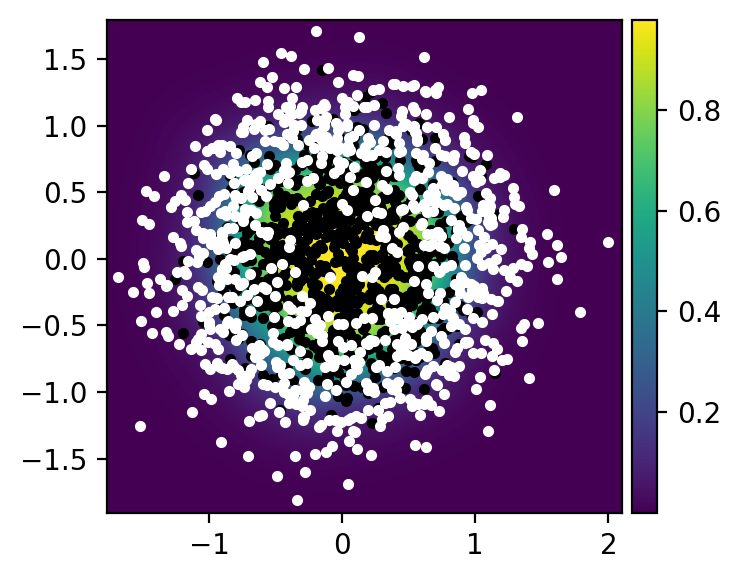

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_oraclestd.png


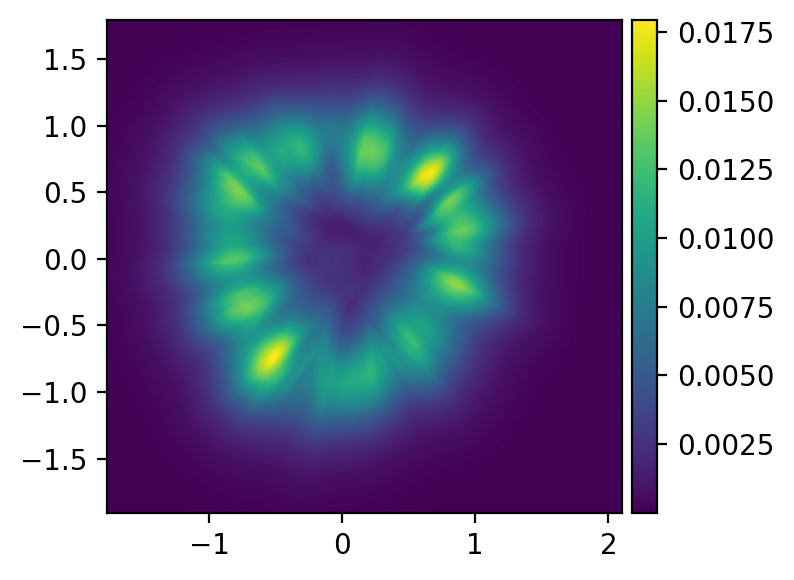

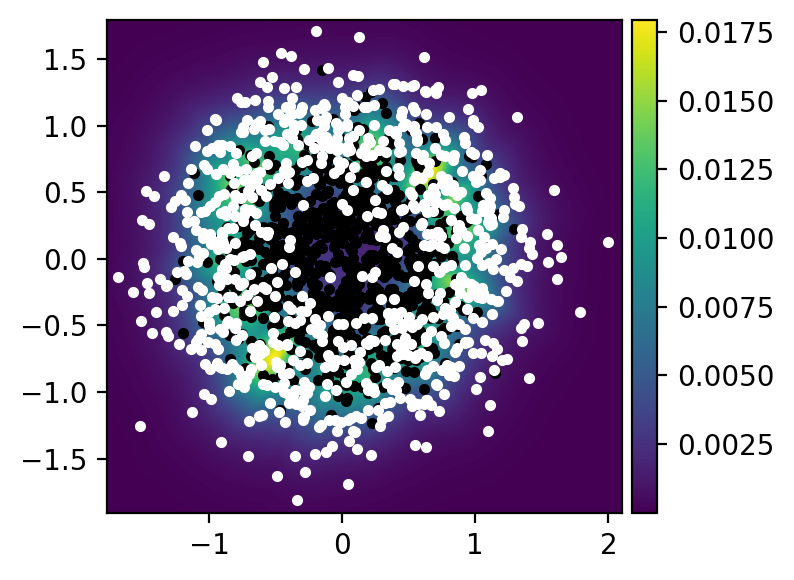

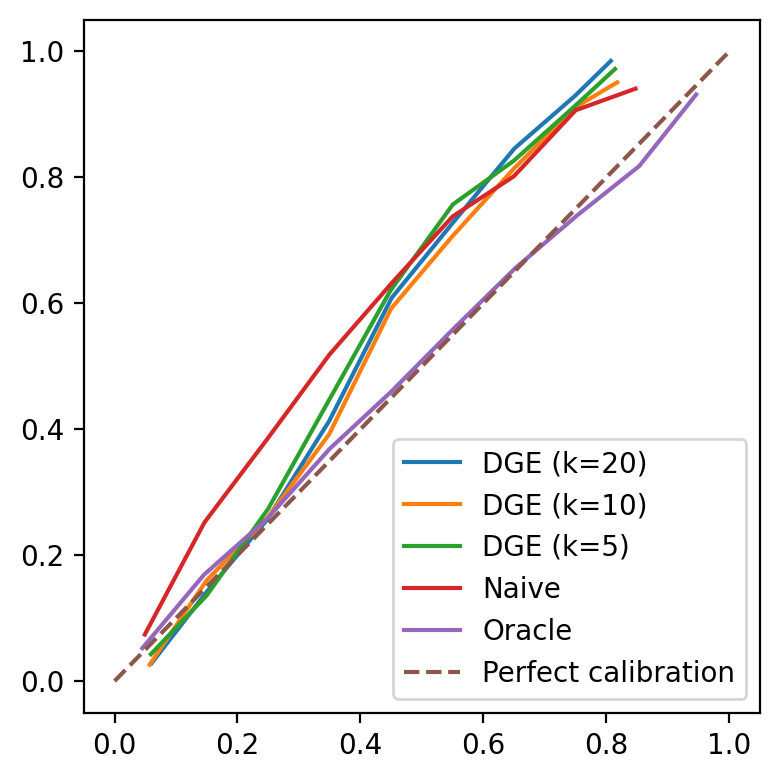

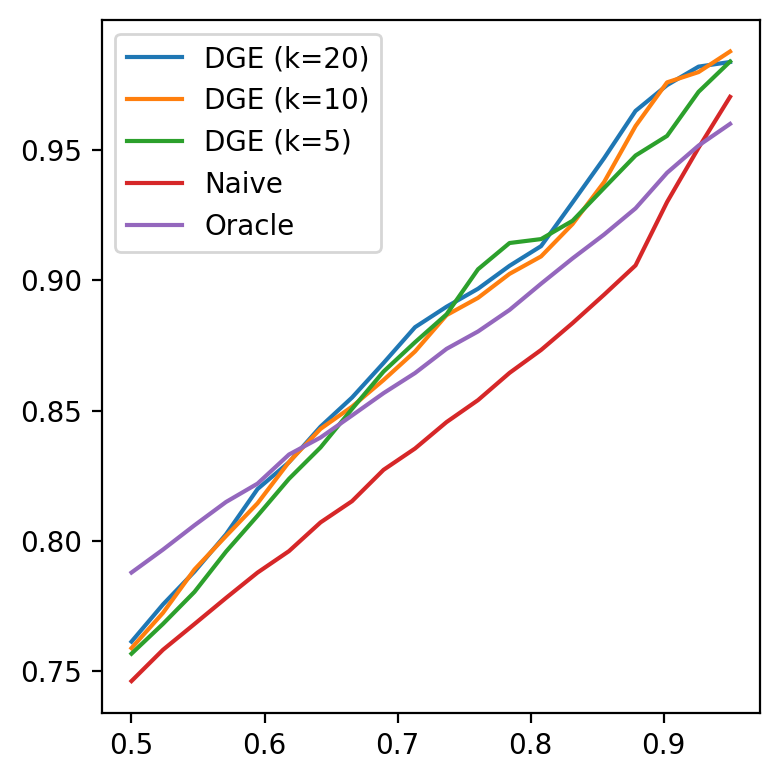

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.863000 &  0.761000 &  0.730000 &   0.841000 &  0.644000 &  0.505000 &  0.167000 \\
DGE (k=10)              &  0.855000 &  0.759000 &  0.732000 &   0.823000 &  0.659000 &  0.506000 &  0.167000 \\
DGE (k=5)               &  0.863000 &  0.757000 &  0.721000 &   0.844000 &  0.630000 &  0.505000 &  0.167000 \\
Oracle                  &  0.868000 &  0.788000 &  0.789000 &   0.785000 &  0.793000 &  0.454000 &  0.147000 \\
Naive (single) median   &  0.825000 &  0.726500 &  0.691000 &   0.789000 &  0.607500 &  0.543500 &  0.182500 \\
Naive (single) mean     &  0.806900 &  0.709850 &  0.670300 &   0.770500 &  0.597200 &  0.572150 &  0.193000 \\
Naive (single) std      &  0.047436 &  0.049913 &  0.069211 &   0.055577 &  0.087686 &  0.076163 &  0.029084 \\
Naive (single) min      &  0.707000 &  0.615000 &  0.549000 &   0.656000 &  0.445

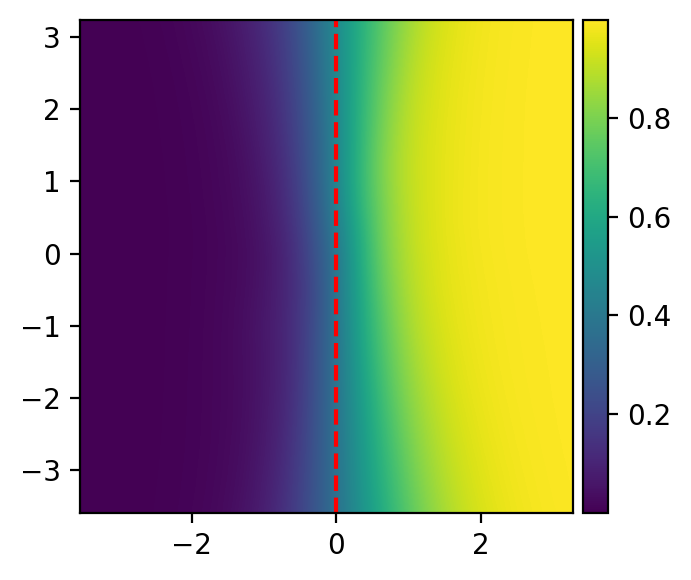

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k20std.png


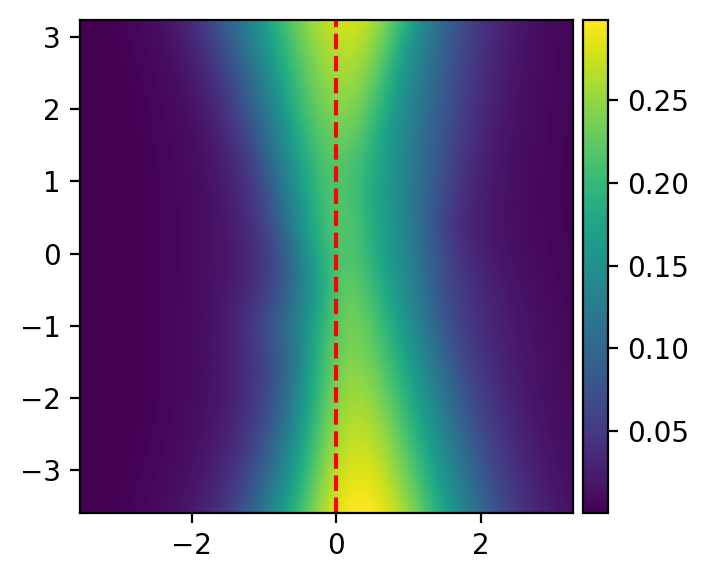

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10mean.png


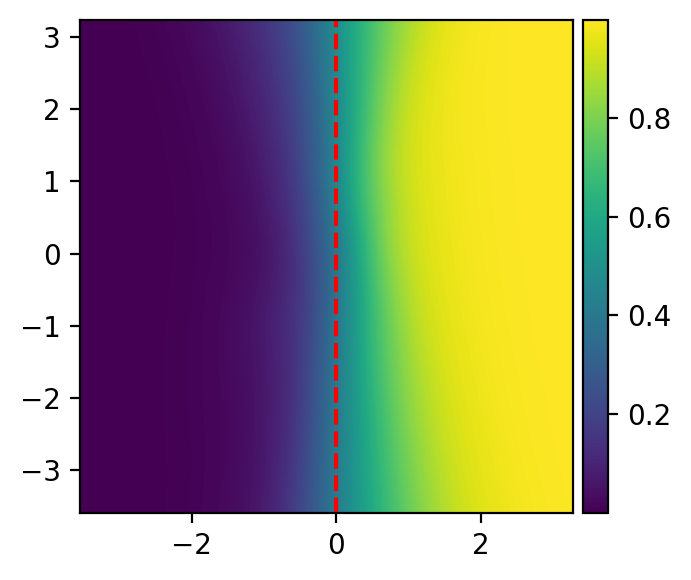

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k10std.png


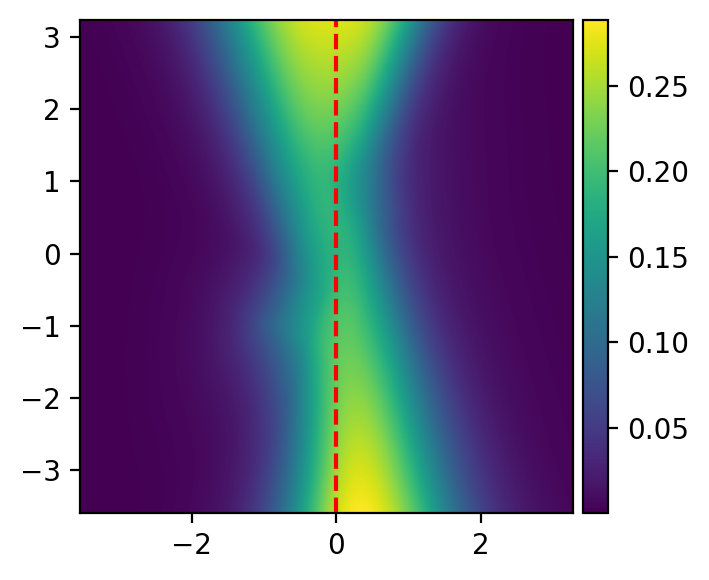

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5mean.png


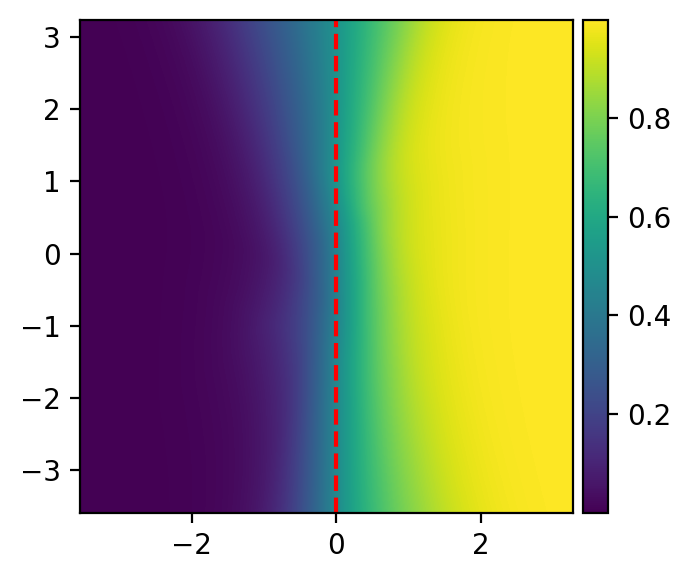

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_DGE_k5std.png


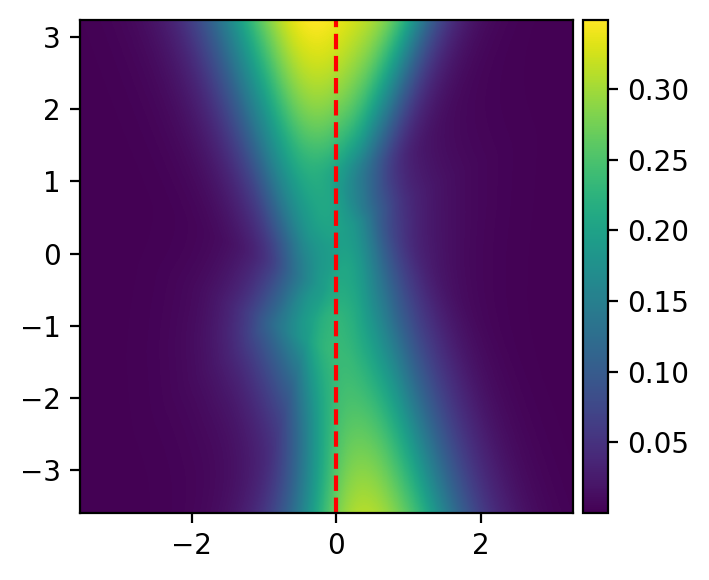

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_mean.png


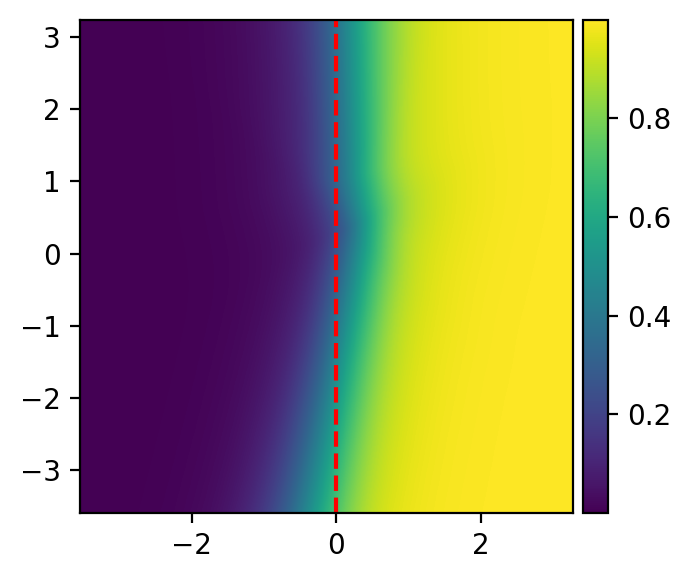

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_naive_m0_std.png


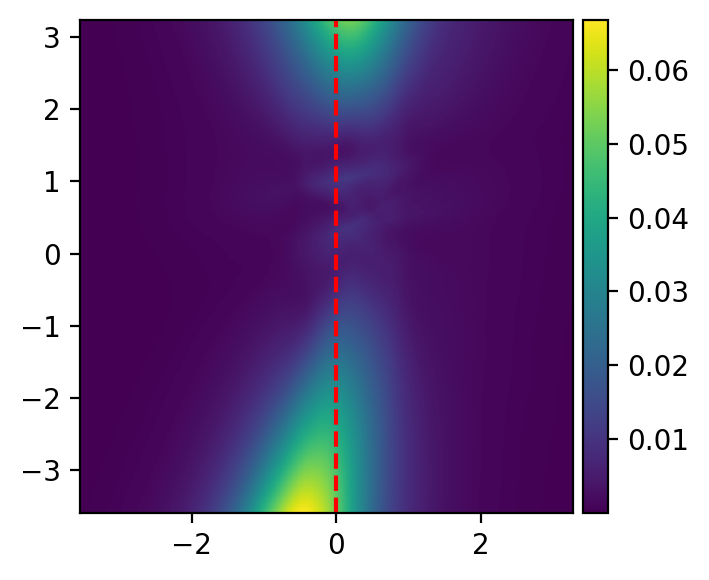

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_oraclemean.png


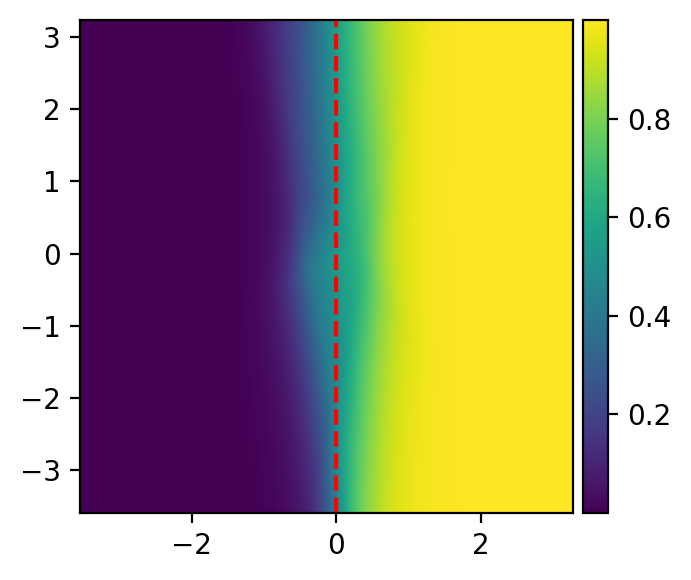

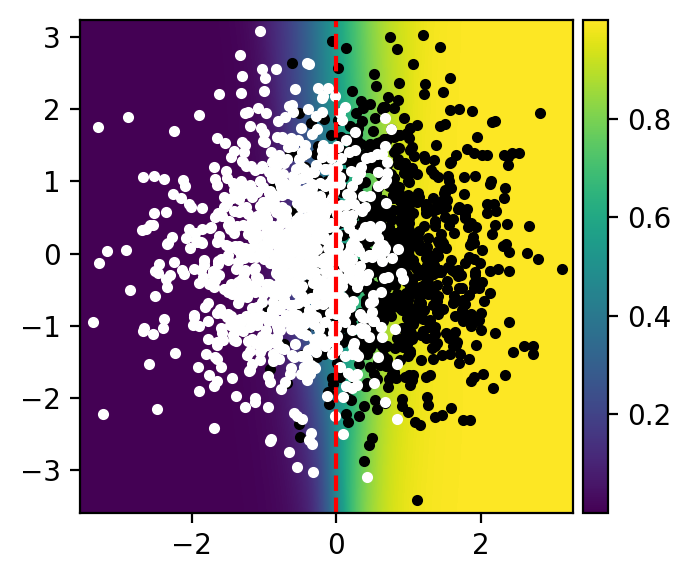

Saving uncertainty_results/gaussian_ctgan_nmax_2000_nsyn_2000supervised_task_oraclestd.png


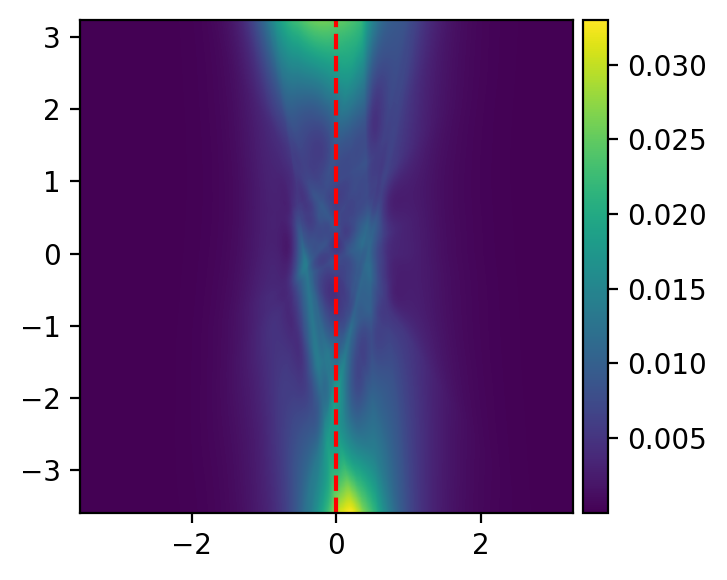

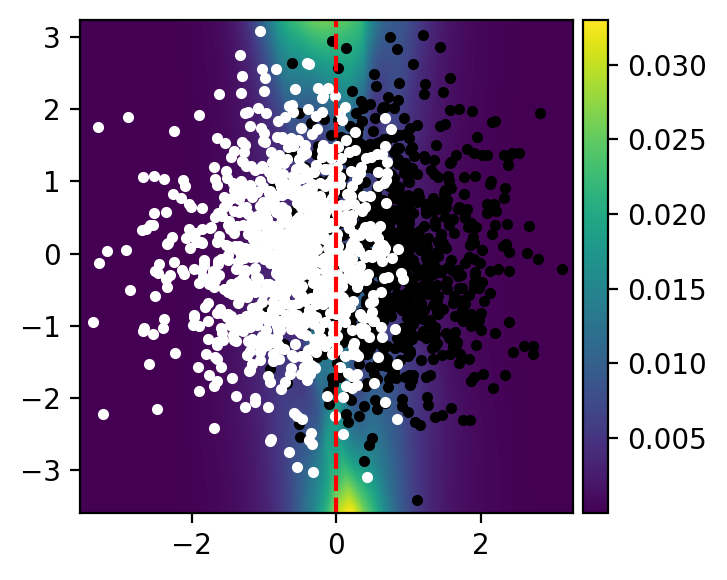

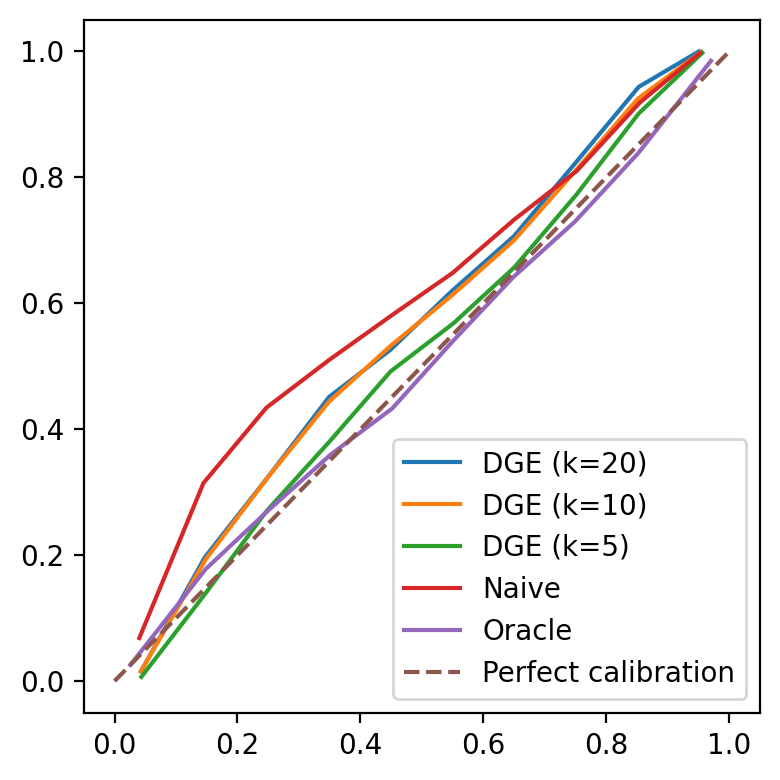

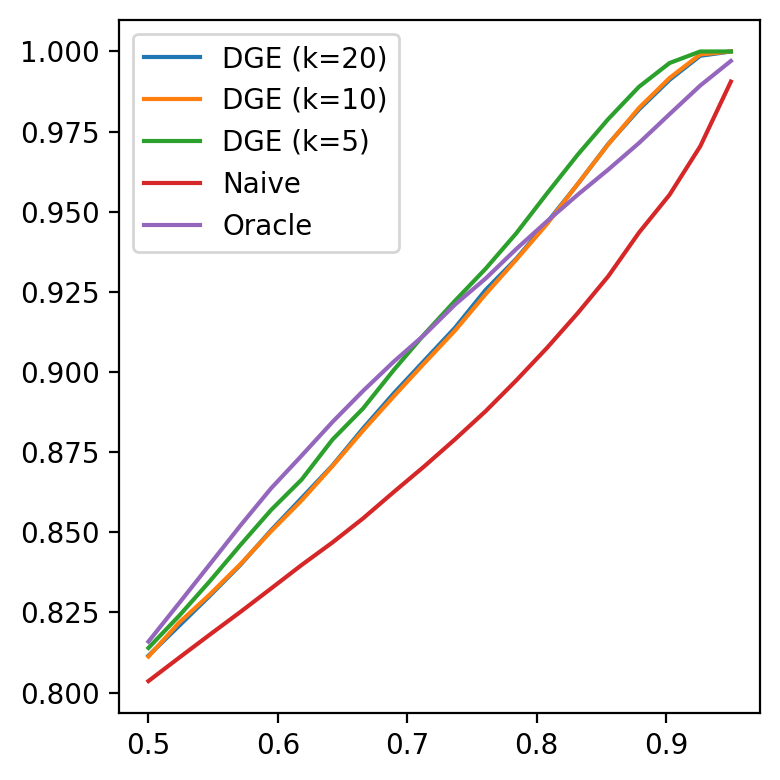

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.911000 &  0.812000 &  0.799000 &   0.854000 &  0.751000 &  0.387000 &  0.126000 \\
DGE (k=10)              &  0.911000 &  0.811000 &  0.799000 &   0.852000 &  0.753000 &  0.384000 &  0.125000 \\
DGE (k=5)               &  0.911000 &  0.814000 &  0.809000 &   0.830000 &  0.789000 &  0.379000 &  0.123000 \\
Oracle                  &  0.912000 &  0.816000 &  0.817000 &   0.811000 &  0.823000 &  0.366000 &  0.122000 \\
Naive (single) median   &  0.909500 &  0.796500 &  0.783000 &   0.869000 &  0.712000 &  0.422500 &  0.138500 \\
Naive (single) mean     &  0.908600 &  0.782550 &  0.756550 &   0.847900 &  0.721400 &  0.459050 &  0.150300 \\
Naive (single) std      &  0.003007 &  0.045083 &  0.102254 &   0.083565 &  0.169888 &  0.123796 &  0.037455 \\
Naive (single) min      &  0.901000 &  0.603000 &  0.339000 &   0.669000 &  0.204

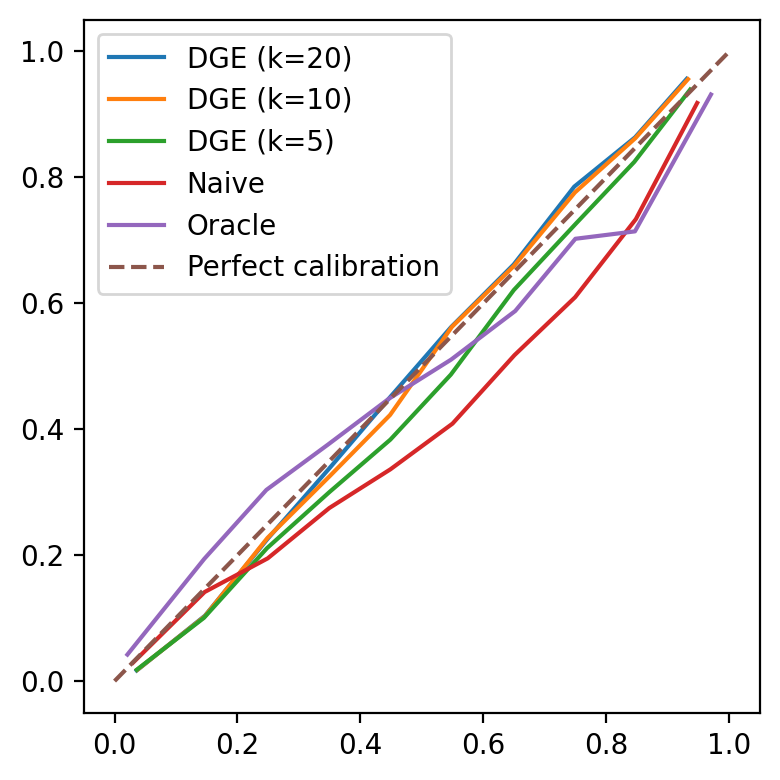

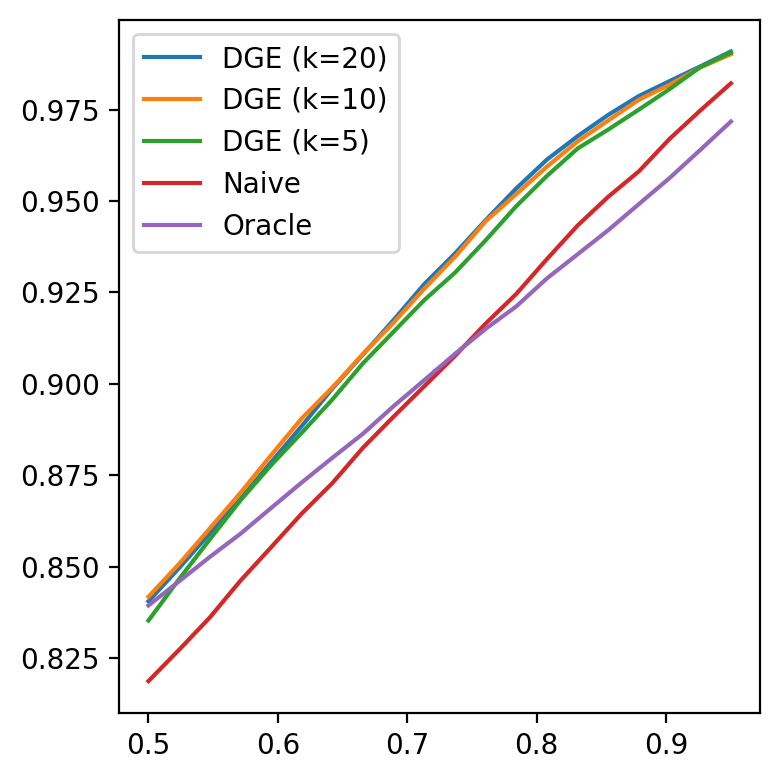

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.893000 &  0.841000 &  0.624000 &   0.721000 &  0.550000 &  0.344000 &  0.110000 \\
DGE (k=10)              &  0.892000 &  0.842000 &  0.632000 &   0.718000 &  0.564000 &  0.346000 &  0.110000 \\
DGE (k=5)               &  0.887000 &  0.835000 &  0.641000 &   0.674000 &  0.611000 &  0.353000 &  0.113000 \\
Oracle                  &  0.889000 &  0.839000 &  0.627000 &   0.711000 &  0.560000 &  0.354000 &  0.112000 \\
Naive (single) median   &  0.867500 &  0.824000 &  0.610000 &   0.656000 &  0.560000 &  0.378500 &  0.121500 \\
Naive (single) mean     &  0.866900 &  0.823700 &  0.603350 &   0.660950 &  0.559250 &  0.379850 &  0.121550 \\
Naive (single) std      &  0.006534 &  0.004124 &  0.021525 &   0.026849 &  0.052615 &  0.011542 &  0.002889 \\
Naive (single) min      &  0.848000 &  0.816000 &  0.567000 &   0.607000 &  0.479

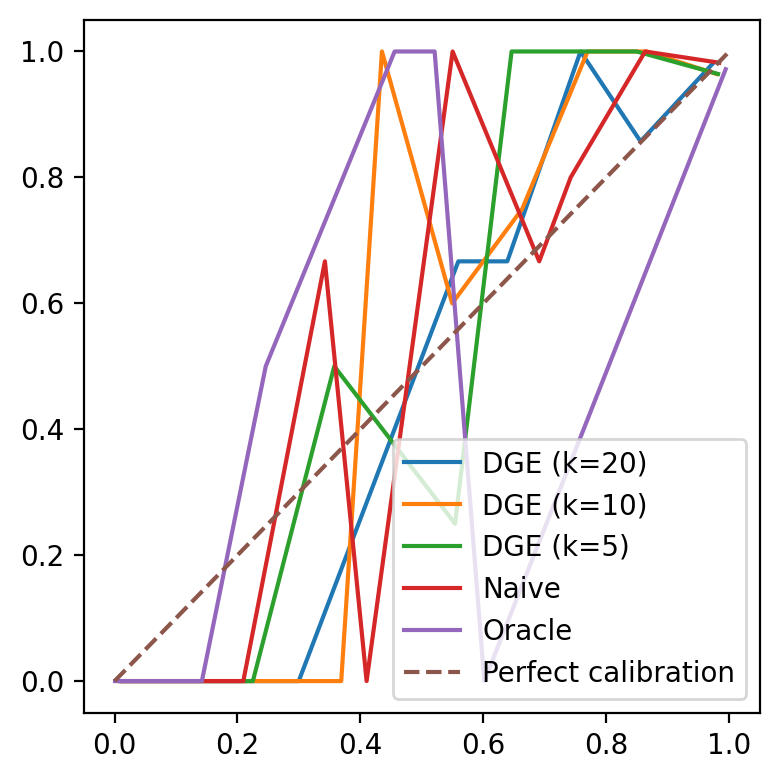

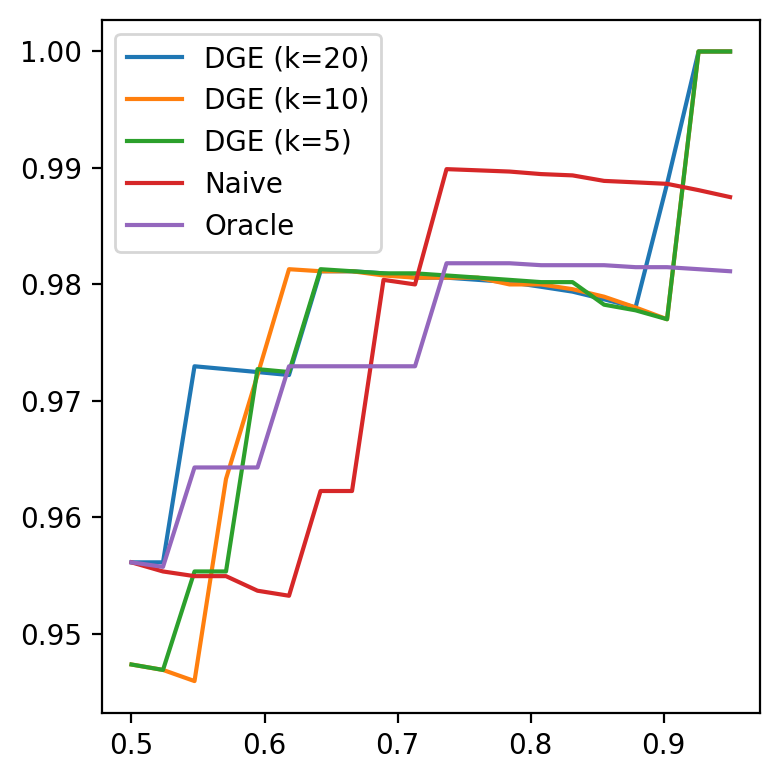

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.987000 &  0.956000 &  0.966000 &   0.935000 &  1.000000 &  0.134000 &  0.037000 \\
DGE (k=10)              &  0.982000 &  0.947000 &  0.959000 &   0.934000 &  0.986000 &  0.142000 &  0.041000 \\
DGE (k=5)               &  0.985000 &  0.947000 &  0.959000 &   0.934000 &  0.986000 &  0.135000 &  0.038000 \\
Oracle                  &  0.993000 &  0.956000 &  0.966000 &   0.959000 &  0.972000 &  0.106000 &  0.030000 \\
Naive (single) median   &  0.980500 &  0.939000 &  0.950500 &   0.944500 &  0.944000 &  0.169500 &  0.050500 \\
Naive (single) mean     &  0.979000 &  0.932950 &  0.947100 &   0.941550 &  0.953400 &  0.184150 &  0.051800 \\
Naive (single) std      &  0.009859 &  0.017084 &  0.013950 &   0.016842 &  0.027751 &  0.053314 &  0.011758 \\
Naive (single) min      &  0.951000 &  0.895000 &  0.915000 &   0.909000 &  0.903

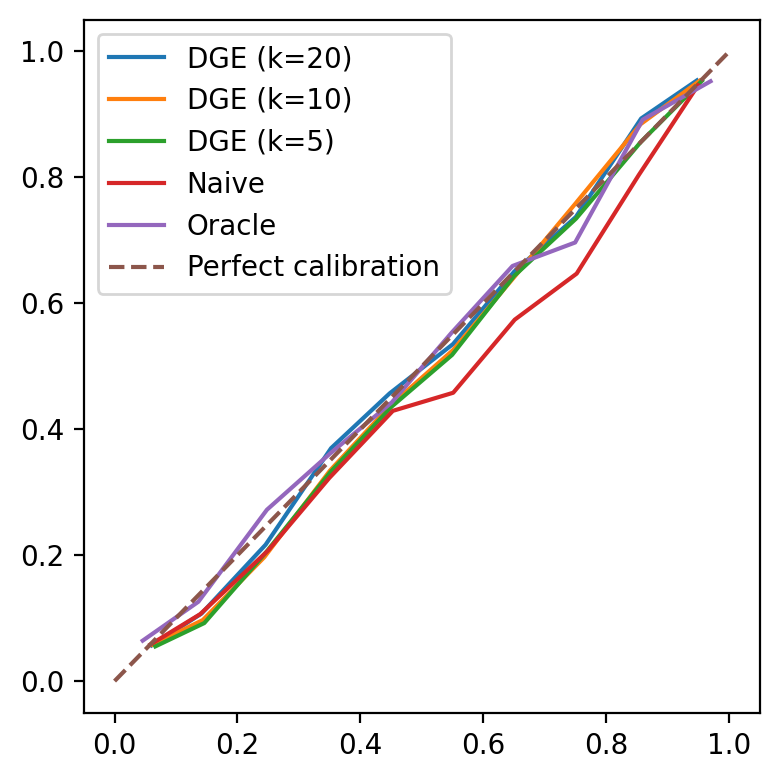

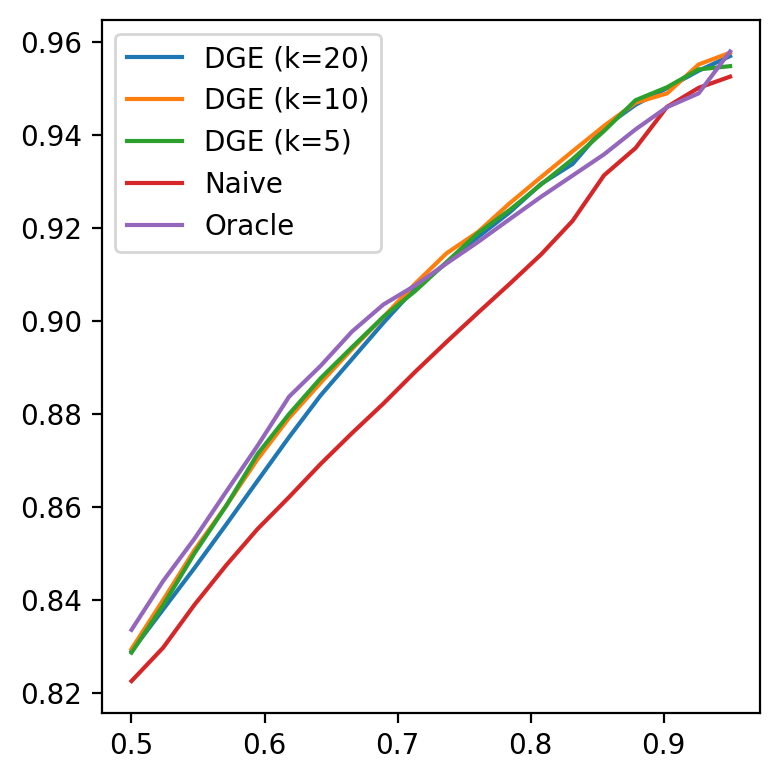

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.907000 &  0.829000 &  0.828000 &   0.833000 &  0.824000 &  0.386000 &  0.120000 \\
DGE (k=10)              &  0.907000 &  0.830000 &  0.830000 &   0.828000 &  0.832000 &  0.387000 &  0.120000 \\
DGE (k=5)               &  0.907000 &  0.829000 &  0.829000 &   0.827000 &  0.832000 &  0.387000 &  0.120000 \\
Oracle                  &  0.911000 &  0.834000 &  0.831000 &   0.844000 &  0.819000 &  0.378000 &  0.117000 \\
Naive (single) median   &  0.904000 &  0.824000 &  0.823000 &   0.831000 &  0.814500 &  0.399000 &  0.123500 \\
Naive (single) mean     &  0.902500 &  0.823000 &  0.821600 &   0.829650 &  0.816700 &  0.402850 &  0.125500 \\
Naive (single) std      &  0.003058 &  0.004648 &  0.008369 &   0.029664 &  0.043073 &  0.010456 &  0.003788 \\
Naive (single) min      &  0.897000 &  0.812000 &  0.798000 &   0.766000 &  0.734

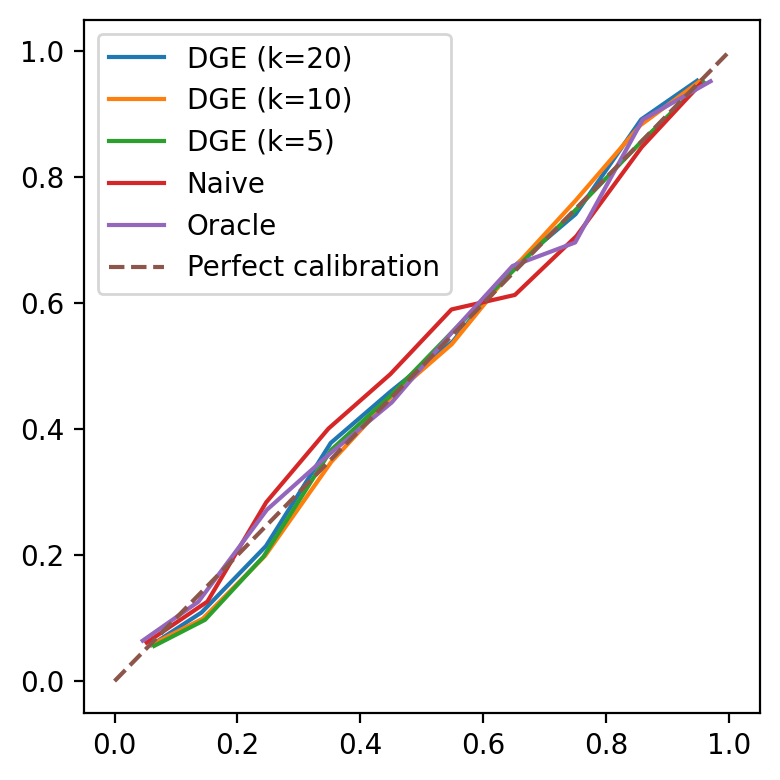

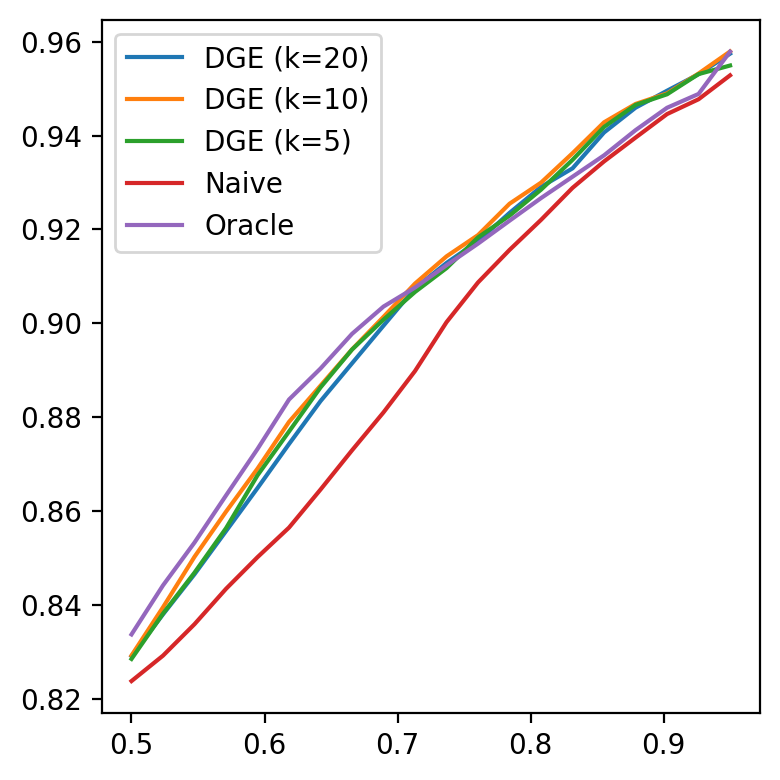

\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
DGE (k=20)              &  0.907000 &  0.829000 &  0.827000 &   0.836000 &  0.819000 &  0.387000 &  0.120000 \\
DGE (k=10)              &  0.907000 &  0.829000 &  0.828000 &   0.833000 &  0.824000 &  0.388000 &  0.120000 \\
DGE (k=5)               &  0.906000 &  0.828000 &  0.826000 &   0.838000 &  0.814000 &  0.389000 &  0.121000 \\
Oracle                  &  0.911000 &  0.834000 &  0.831000 &   0.844000 &  0.819000 &  0.378000 &  0.117000 \\
Naive (single) median   &  0.904000 &  0.824000 &  0.822000 &   0.833500 &  0.813000 &  0.399000 &  0.123500 \\
Naive (single) mean     &  0.902450 &  0.822900 &  0.820900 &   0.831550 &  0.813400 &  0.403000 &  0.125550 \\
Naive (single) std      &  0.003074 &  0.004668 &  0.008306 &   0.029108 &  0.042460 &  0.010421 &  0.003788 \\
Naive (single) min      &  0.897000 &  0.812000 &  0.798000 &   0.766000 &  0.734

In [5]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_scores = {}
dataset_type = 'classification'

for dataset in datasets:
    workspace_folder, results_folder = get_folder_names(dataset, model_name, max_n, nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n)
    if X_gt.targettype != dataset_type:
        continue
    
    print(f'Dataset {dataset}\n')
    
    y_preds, scores = predictive_experiment(X_gt,
                      X_syns,
                      workspace_folder=workspace_folder,
                      results_folder=results_folder,
                      save=save,
                      load=load,
                      plot=True,
                      #ensemble_baseline=True,
                      )

    print(scores.to_latex())

    all_scores[dataset]=scores


In [6]:
print('All scores:')

def mean_across_pandas(dfs):
    dfs = pd.concat(dfs.values())
    df_mean = dfs.groupby(level=0).mean()
    df_mean = df_mean.round(3)
    print(df_mean.to_latex(float_format=lambda x: '%.3f' % x))
    return df_mean

mean_across_pandas(all_scores)


# use scores but report per dataset

def metric_different_datasets(dfs, metric='AUC', to_print=True):
    df_all_datasets = pd.concat([score[metric] for score in dfs.values()], axis=1)
    df_all_datasets.columns = dfs.keys()
    df_all_datasets.round(3)

    for dataset in zip(['moons', 'circles', 'adult', 'breast_cancer', 'seer', 'cutract'][::-1], 
        ['Moons', 'Circles', 'Adult Income', 'Breast Cancer', 'SEER', 'CUTRACT'][::-1]):
        try:
            df_all_datasets.insert(0, dataset[1], df_all_datasets.pop(dataset[0]))
        except:
            continue
    df_all_datasets['Mean'] = df_all_datasets.mean(axis=1)
    
    if to_print:
        print(df_all_datasets.to_latex(float_format=lambda x: '%.3f' % x))

    return df_all_datasets

metric_different_datasets(all_scores)

All scores:
\begin{tabular}{lrrrrrrr}
\toprule
{} &   AUC &   Acc &    F1 &  Precision &  Recall &   NLL &  Brier \\
\midrule
DGE (k=10)              & 0.919 & 0.848 & 0.814 &      0.843 &   0.792 & 0.335 &  0.106 \\
DGE (k=20)              & 0.921 & 0.850 & 0.814 &      0.846 &   0.790 & 0.334 &  0.105 \\
DGE (k=5)               & 0.920 & 0.847 & 0.815 &      0.837 &   0.798 & 0.335 &  0.106 \\
Naive (ensemble) max    & 0.920 & 0.857 & 0.831 &      0.893 &   0.878 & 0.508 &  0.158 \\
Naive (ensemble) mean   & 0.907 & 0.830 & 0.791 &      0.826 &   0.771 & 0.370 &  0.118 \\
Naive (ensemble) median & 0.911 & 0.834 & 0.799 &      0.833 &   0.771 & 0.357 &  0.114 \\
Naive (ensemble) min    & 0.880 & 0.774 & 0.689 &      0.750 &   0.625 & 0.324 &  0.101 \\
Naive (ensemble) std    & 0.011 & 0.021 & 0.035 &      0.039 &   0.065 & 0.045 &  0.014 \\
Naive (single) max      & 0.920 & 0.856 & 0.830 &      0.892 &   0.880 & 0.511 &  0.158 \\
Naive (single) mean     & 0.906 & 0.830 & 0.791 &      

Moons   Circles  Adult Income  Breast Cancer  \
DGE (k=20)               0.981000  0.863000      0.893000       0.987000   
DGE (k=10)               0.980000  0.855000      0.892000       0.982000   
DGE (k=5)                0.979000  0.863000      0.887000       0.985000   
Oracle                   0.996000  0.868000      0.889000       0.993000   
Naive (single) median    0.980500  0.825000      0.867500       0.980500   
Naive (single) mean      0.978750  0.806900      0.866900       0.979000   
Naive (single) std       0.008160  0.047436      0.006534       0.009859   
Naive (single) min       0.956000  0.707000      0.848000       0.951000   
Naive (single) max       0.988000  0.862000      0.878000       0.990000   
Naive (ensemble) median  0.980500  0.825000      0.870000       0.983000   
Naive (ensemble) mean    0.978150  0.806650      0.869000       0.981150   
Naive (ensemble) std     0.007863  0.047444      0.006731       0.009040   
Naive (ensemble) min     0.957000  0.706000      0.848000       0.954000   
Naive (ensemble) max     0.988000  0.862000      0.878000       0.991000   

                             SEER   CUTRACT  gaussian      Mean  
DGE (k=20)               0.907000  0.907000  0.911000  0.921286  
DGE (k=10)               0.907000  0.907000  0.911000  0.919143  
DGE (k=5)                0.907000  0.906000  0.911000  0.919714  
Oracle                   0.911000  0.911000  0.912000  0.925714  
Naive (single) median    0.904000  0.904000  0.909500  0.910143  
Naive (single) mean      0.902500  0.902450  0.908600  0.906443  
Naive (single) std       0.003058  0.003074  0.003007  0.011590  
Naive (single) min       0.897000  0.897000  0.901000  0.879571  
Naive (single) max       0.906000  0.906000  0.912000  0.920286  
Naive (ensemble) median  0.904000  0.904000  0.910000  0.910929  
Naive (ensemble) mean    0.903000  0.902900  0.909150  0.907143  
Naive (ensemble) std     0.002983  0.002982  0.002798  0.011406  
Naive (ensemble) min     0.897000  0.897000  0.902000  0.880143  
Naive (ensemble) max     0.906000  0.906000  0.912000  0.920429

## Model Evaluation

We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow.
0. Train and generate synthetic datasets $S_i$.
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic dataset's test set $S_{i,test}$, giving $\hat{M}^S_i$ [Single performance]
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle performance]
5. Evaluate on the other synthetic datasets $\cup_{j\neq i} S_{j}$, giving $\hat{M}^G_i$ [Generative performance]
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average over all models $f_i$. 
7. Repeat 1-6 for different model classes $f$

N.B. the idea of the above, is that the trained model $f_i$ is the same for each evaluation type. In the model selection section, we will compare the performance of different model classes, where we will train a new model for each evaluation type (hence the aim is to evaluate which class is best, while the model itself may vary).

In [4]:
from DGE_experiments import model_evaluation_experiment

importlib.reload(DGE_experiments)
importlib.reload(DGE_data)
importlib.reload(DGE_utils)


evaluation_means = {}
evaluation_std = {}
relative = 'l1'
for dataset in datasets:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(dataset, model_name, max_n, nsyn)

    if dataset not in ['moons', 'circles', 'adult', 'breast_cancer', 'seer', 'cutract']:
        continue
    
    # load data
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n = max_n)

    # get mean and std of dataset over different runs
    means, std = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                        model_type='mlp', 
                                        load=load, 
                                        save=load,
                                        verbose=True 
                                        )
    
    evaluation_means[dataset] = means
    evaluation_std[dataset] = std


Dataset: moons
n_total 10000 n_train: 2000
Dataset: circles
n_total 10000 n_train: 2000


In [8]:
def add_std(df, std):
    for column in df.columns:
        if column in std.columns:
            df[column] = df[column].astype(str) + ' ± ' + std[column].astype(str)
    return df


# mean across datasets
# mean_across_pandas(evaluation_means)

# per dataset
metric = 'AUC'
res = metric_different_datasets(evaluation_means, metric=metric, to_print=False)
std_df = metric_different_datasets(evaluation_std, metric=metric, to_print=False)
del std_df['Mean']
res = add_std(res, std_df)
print(res.to_latex(float_format=lambda x: '%.3f' % x))

\begin{tabular}{lllllllr}
\toprule
{} &          Moons &        Circles &   Adult Income &  Breast Cancer &           SEER &        CUTRACT &  Mean \\
\midrule
Oracle     &  0.976 ± 0.009 &  0.805 ± 0.049 &  0.863 ± 0.006 &  0.978 ± 0.012 &  0.902 ± 0.003 &  0.902 ± 0.003 & 0.904 \\
Naive      &      0.0 ± 0.0 &  0.002 ± 0.002 &  0.001 ± 0.001 &  0.001 ± 0.001 &      0.0 ± 0.0 &      0.0 ± 0.0 & 0.001 \\
DGE (K=5)  &      0.0 ± 0.0 &  0.012 ± 0.005 &    0.001 ± 0.0 &      0.0 ± 0.0 &      0.0 ± 0.0 &      0.0 ± 0.0 & 0.002 \\
DGE (K=10) &      0.0 ± 0.0 &  0.011 ± 0.006 &    0.001 ± 0.0 &      0.0 ± 0.0 &      0.0 ± 0.0 &      0.0 ± 0.0 & 0.002 \\
DGE (K=20) &      0.0 ± 0.0 &  0.011 ± 0.005 &    0.001 ± 0.0 &    0.001 ± 0.0 &      0.0 ± 0.0 &      0.0 ± 0.0 & 0.002 \\
\bottomrule
\end{tabular}



## Model Selection
Essentially repeat the above for different models

In [9]:
importlib.reload(DGE_experiments)
from DGE_experiments import model_selection_experiment

if X_gt.targettype is not None:
    if X_gt.targettype == 'classification':
        metric = 'Acc'
    elif X_gt.targettype == 'regression':
        metric = 'MAE'
    
    results, means_sorted = model_selection_experiment(X_gt, X_syns, relative=False, 
                                                        metric=metric, 
                                                        workspace_folder=workspace_folder, load=load, save=save)


print(results.to_latex())

KeyboardInterrupt: 

## Model Uncertainty
see output Model Training.

## Influence of synthetic data size

Let's study the effect of synthetic data size.

In [ ]:
from DGE_experiments import predictive_varying_nsyn

predictive_varying_nsyn(X_gt, X_syns, dataset, model_name, n_models,
                        nsyn, results_folder, workspace_folder, load, save, verbose=True)


## Density estimation


In [ ]:
#from DGE_experiments import density_experiment

#if X_gt.targettype is None:
#    density_experiment(X_gt, X_syns, load, save)


# Model parameter estimation
Using a linear model

# Cross validation

We compare the single baseline model vs the generative uncertainty model. Single workflow
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic datasets test set $S_{i,test}$
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $\hat{M}_i$
5. Average results across the different synthetic datasets, giving $M_i$.
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average.

Versus our baseline
1. Take each synthetic dataset $S_i$ and split it up in train and test
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic datasets test set $S_{i,test}
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $\hat{M}_i$
5. Average results across the different synthetic datasets, giving $M_i$.
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average.


Cross-validation approach to test which type of model would perform best on real data. We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow Cross-validation.
0. Train and generate synthetic datasets $S_i$.
1. Use CV to train and evaluate models $f_i$ on each $S_i$. Repeat for all $S_i$. [Single performance]
2. Use CV \textit{over datasets $S_i$} (i.e. train on all but one $S_i$, evaluate on remaining and repeat) to train and evaluate models $f_i$.
3. For both cases, evaluate the model also on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle performance]
4. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average over all models $f_i$. 